<a href="https://colab.research.google.com/github/sabbir179/test2/blob/main/TeslaFinancialForecast%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [6]:
!pip install prophet
import prophet

In [2]:
pip install pystan


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.4 MB/s eta 0:00:00


In [5]:
pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 27.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 93.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=e074ebe80e1fb7a998519fc7e787179c8e227bc37ab8071f4e9ed34a941e162e
  Stored in directory: /root/.cache/pip/wheels/d6/67/78/aa2e8d108639dd23a5e9e72a4fc88bb44f5541894382712f48
Successfully built py

In [8]:
pip install prophet

In [9]:
from prophet import Prophet

In [11]:
import pandas as pd
import plotly.express as px
#from fbprophet import Prophet
#import prophet

In [12]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [14]:
df= pd.read_csv("TSLA.csv")

In [ ]:
#read_csv function from pandas

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-23,203.910004,205.139999,196.330002,202.070007,202.070007,146360000
1,2023-02-24,196.330002,197.669998,192.800003,196.880005,196.880005,142228100
2,2023-02-27,202.029999,209.419998,201.259995,207.630005,207.630005,161028300
3,2023-02-28,210.589996,211.229996,203.750000,205.710007,205.710007,153144900
4,2023-03-01,206.210007,207.199997,198.520004,202.770004,202.770004,156852800
...,...,...,...,...,...,...,...
247,2024-02-16,202.059998,203.169998,197.399994,199.949997,199.949997,111173600
248,2024-02-20,196.130005,198.600006,189.130005,193.759995,193.759995,104545800
249,2024-02-21,193.360001,199.440002,191.949997,194.770004,194.770004,103844000
250,2024-02-22,194.000000,198.320007,191.360001,197.410004,197.410004,92739500


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [17]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,223.294842,227.497976,218.962738,223.387778,223.387778,1.244249e+08
std,34.404508,34.804602,33.909565,34.309596,34.309596,2.592340e+07
min,152.639999,160.479996,152.369995,153.750000,153.750000,6.512520e+07
25%,191.582497,195.149994,187.849995,191.479996,191.479996,1.058033e+08
50%,229.955002,235.364998,225.959999,232.120003,232.120003,1.200864e+08
75%,251.562496,257.977501,247.324993,252.699993,252.699993,1.377933e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [18]:
#Area graph
px.area(df, x='Date', y='Close')

In [19]:
# Line graph
px.line(df, x='Date', y='Close')

In [20]:
px.area(df, x='Date', y='Volume')

In [21]:
px.bar(df, y='Volume')


In [22]:
px.box(df, y='Close')

# Understanding Facebook Prophet

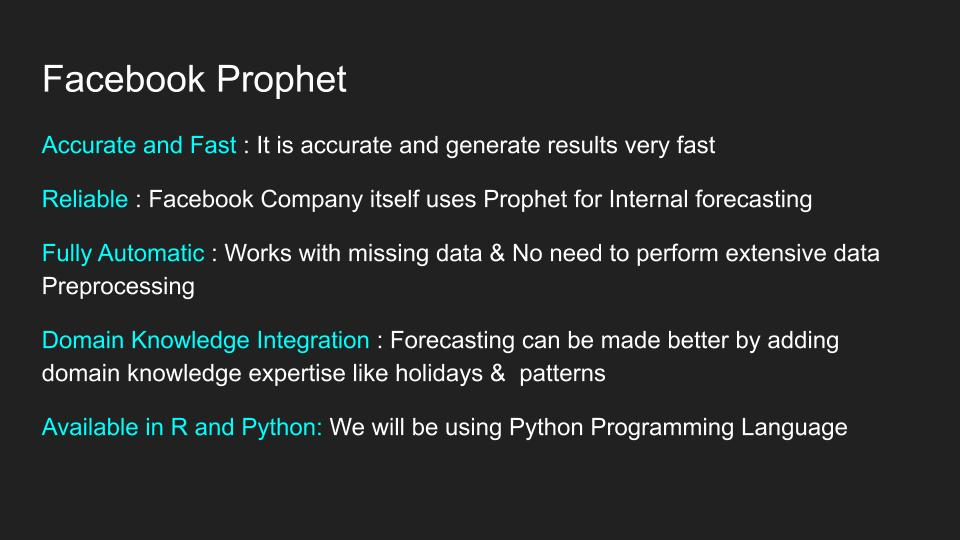

## Data Preperation

In [23]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-23,203.910004,205.139999,196.330002,202.070007,202.070007,146360000
1,2023-02-24,196.330002,197.669998,192.800003,196.880005,196.880005,142228100
2,2023-02-27,202.029999,209.419998,201.259995,207.630005,207.630005,161028300
3,2023-02-28,210.589996,211.229996,203.750000,205.710007,205.710007,153144900
4,2023-03-01,206.210007,207.199997,198.520004,202.770004,202.770004,156852800
...,...,...,...,...,...,...,...
247,2024-02-16,202.059998,203.169998,197.399994,199.949997,199.949997,111173600
248,2024-02-20,196.130005,198.600006,189.130005,193.759995,193.759995,104545800
249,2024-02-21,193.360001,199.440002,191.949997,194.770004,194.770004,103844000
250,2024-02-22,194.000000,198.320007,191.360001,197.410004,197.410004,92739500


In [24]:
columns=['Date', "Close"]
ndf= pd.DataFrame(df, columns=columns)

In [24]:
ndf

,Date,Close
0,2023-02-23,202.070007
1,2023-02-24,196.880005
2,2023-02-27,207.630005
3,2023-02-28,205.710007
4,2023-03-01,202.770004
...,...,...
247,2024-02-16,199.949997
248,2024-02-20,193.759995
249,2024-02-21,194.770004
250,2024-02-22,197.410004


In [25]:
  prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [26]:
prophet_df

,ds,y
0,2023-02-23,202.070007
1,2023-02-24,196.880005
2,2023-02-27,207.630005
3,2023-02-28,205.710007
4,2023-03-01,202.770004
...,...,...
247,2024-02-16,199.949997
248,2024-02-20,193.759995
249,2024-02-21,194.770004
250,2024-02-22,197.410004


## Creating Facebook Prophet Model

In [27]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_90qwke/rlyyh9o0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg_90qwke/dh0kzxha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51867', 'data', 'file=/tmp/tmpg_90qwke/rlyyh9o0.json', 'init=/tmp/tmpg_90qwke/dh0kzxha.json', 'output', 'file=/tmp/tmpg_90qwke/prophet_modelc_rz_zdb/prophet_model-20240226053125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:31:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:31:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [28]:
future=m.make_future_dataframe(periods=30)
forcast=m.predict(future)

In [29]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-02-23,182.264753,152.825107,201.347500,182.264753,182.264753,-4.474509,-4.474509,-4.474509,-4.474509,-4.474509,-4.474509,0.0,0.0,0.0,177.790245
1,2023-02-24,182.419873,154.009581,201.884123,182.419873,182.419873,-4.379131,-4.379131,-4.379131,-4.379131,-4.379131,-4.379131,0.0,0.0,0.0,178.040742
2,2023-02-27,182.885232,152.418407,203.573901,182.885232,182.885232,-4.696661,-4.696661,-4.696661,-4.696661,-4.696661,-4.696661,0.0,0.0,0.0,178.188571
3,2023-02-28,183.040352,156.487704,205.422245,183.040352,183.040352,-2.340796,-2.340796,-2.340796,-2.340796,-2.340796,-2.340796,0.0,0.0,0.0,180.699557
4,2023-03-01,183.195472,155.006712,205.223889,183.195472,183.195472,-3.316758,-3.316758,-3.316758,-3.316758,-3.316758,-3.316758,0.0,0.0,0.0,179.878714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2024-03-20,191.521088,163.480953,214.257430,188.917423,194.238301,-3.316758,-3.316758,-3.316758,-3.316758,-3.316758,-3.316758,0.0,0.0,0.0,188.204330
278,2024-03-21,191.094827,161.647977,212.353378,188.256736,194.035066,-4.474509,-4.474509,-4.474509,-4.474509,-4.474509,-4.474509,0.0,0.0,0.0,186.620318
279,2024-03-22,190.668566,162.223725,208.757254,187.632945,193.800910,-4.379131,-4.379131,-4.379131,-4.379131,-4.379131,-4.379131,0.0,0.0,0.0,186.289435
280,2024-03-23,190.242304,173.669072,222.947126,186.977106,193.506871,9.603928,9.603928,9.603928,9.603928,9.603928,9.603928,0.0,0.0,0.0,199.846232


##Downloading the Forecast data

In [30]:
px.line(forcast, x='ds', y='yhat')

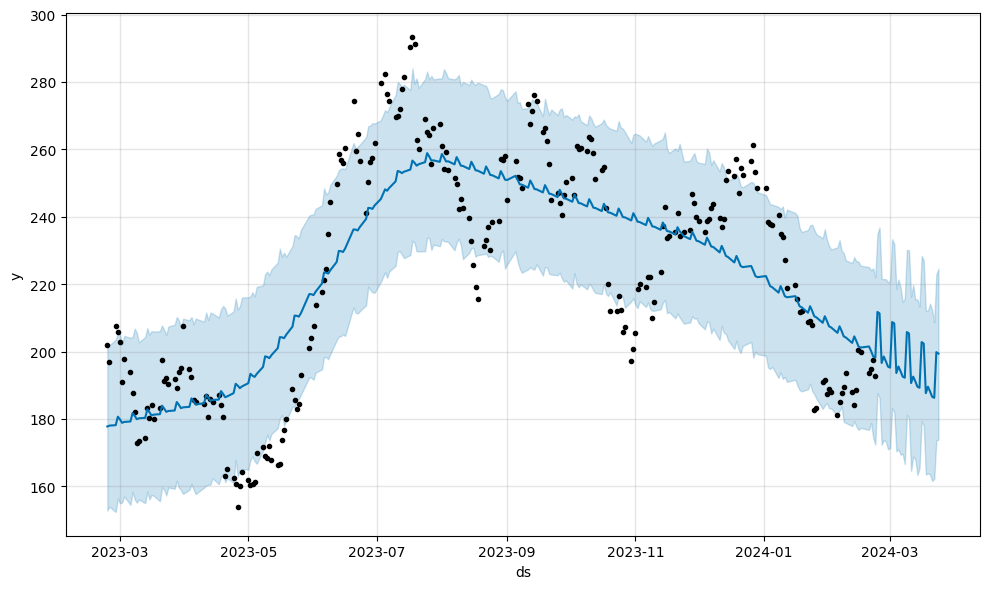

In [31]:
figure=m.plot(forcast, xlabel='ds', ylabel='y')

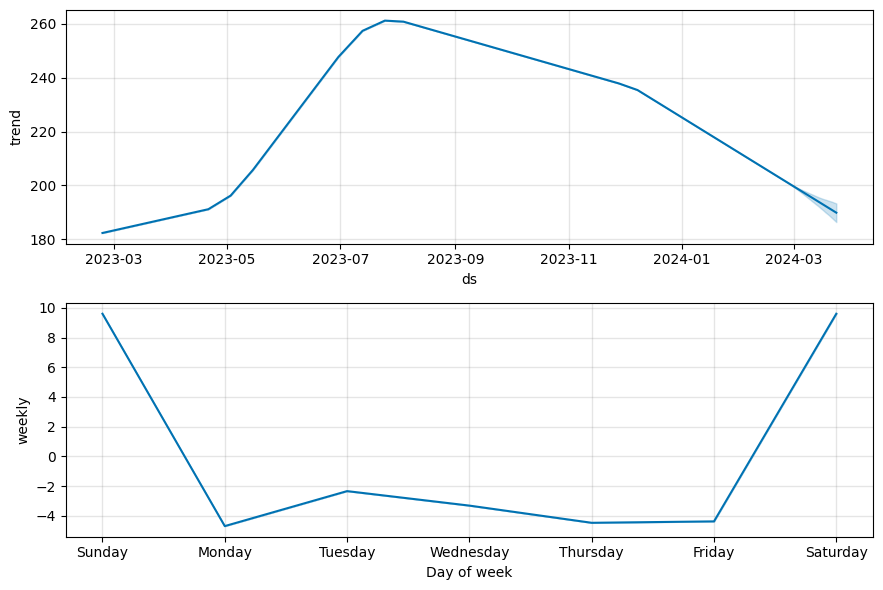

In [32]:
#profit and componet
figure2=m.plot_components(forcast)

Downloading the Forcast data

In [33]:
from google.colab import files
forcast.to_csv('forcast.csv')
files.download('forcast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>